## Data Prepration

In [1]:
import pandas as pd
import numpy as np

In [2]:
attack=pd.read_csv(r'ftp_attack_data.csv')
normal=pd.read_csv(r'ftp_normal_data.csv')
df=pd.concat([attack, normal],axis=0)
df.head()

,frame.number,frame.time_epoch,frame.len,frame.cap_len,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.ttl,...,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.stream,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,attack
0,1,1.764526e+09,90,90,00:50:56:c0:00:08,33:33:00:00:00:16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,1.764526e+09,60,60,00:50:56:c0:00:08,01:00:5e:00:00:16,10.0.3.1,224.0.0.22,40.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,1.764526e+09,90,90,00:50:56:c0:00:08,33:33:00:00:00:16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,1.764526e+09,60,60,00:50:56:c0:00:08,01:00:5e:00:00:16,10.0.3.1,224.0.0.22,40.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,1.764526e+09,60,60,00:50:56:c0:00:08,01:00:5e:00:00:16,10.0.3.1,224.0.0.22,40.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725930 entries, 0 to 486378
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.number           725930 non-null  int64  
 1   frame.time_epoch       725930 non-null  float64
 2   frame.len              725930 non-null  int64  
 3   frame.cap_len          725930 non-null  int64  
 4   eth.src                725930 non-null  object 
 5   eth.dst                725930 non-null  object 
 6   ip.src                 724581 non-null  object 
 7   ip.dst                 724581 non-null  object 
 8   ip.len                 724581 non-null  float64
 9   ip.ttl                 724581 non-null  float64
 10  ip.proto               724581 non-null  float64
 11  tcp.srcport            720876 non-null  float64
 12  tcp.dstport            720876 non-null  float64
 13  tcp.len                720876 non-null  float64
 14  tcp.seq                720876 non-null  f

In [4]:
df.columns

Index(['frame.number', 'frame.time_epoch', 'frame.len', 'frame.cap_len',
       'eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.len', 'ip.ttl',
       'ip.proto', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq',
       'tcp.ack', 'tcp.hdr_len', 'tcp.flags', 'tcp.flags.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.window_size_value', 'tcp.stream', 'tcp.time_delta',
       'tcp.time_relative', 'ftp.response.code', 'ftp.request.command',
       'attack'],
      dtype='object')

## Cleaning and Preprocessing

In [5]:
columns_to_drop = ['frame.number','tcp.stream','frame.cap_len','eth.src','eth.dst','ip.src','ip.dst','ip.proto', 'frame.time_epoch','tcp.seq','tcp.ack']
df = df.drop(columns=columns_to_drop, axis=1)

In [6]:
df.head()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,attack
0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,60,40.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,60,40.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,60,40.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
categorical_columns= df.select_dtypes(include=['object']).columns
categorical_columns

Index(['tcp.flags', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.fin',
       'tcp.flags.reset', 'tcp.flags.push', 'ftp.request.command'],
      dtype='object')

In [8]:
df.shape

(725930, 19)

In [9]:
df_copy = df.copy()

In [10]:
flag_cols = [
    "tcp.flags.syn",
    "tcp.flags.ack",
    "tcp.flags.fin",
    "tcp.flags.reset",
    "tcp.flags.push"
]

df_copy = df_copy.drop(df_copy[df_copy[flag_cols].isna().all(axis=1)].index)

In [11]:
df_copy.shape

(717033, 19)

In [12]:
df_copy['attack'].value_counts()

attack
0    481522
1    235511
Name: count, dtype: int64

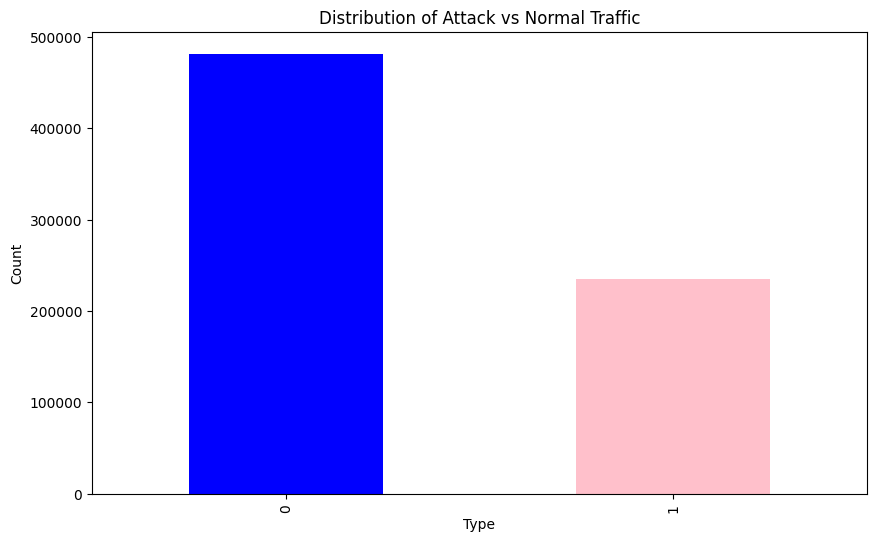

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_copy['attack'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Attack vs Normal Traffic')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [14]:
df_copy.head()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,attack
405,66,52.0,64.0,45323.0,21.0,0.0,32.0,0x0011,False,True,True,False,False,502.0,4.250620e-04,0.011372,NaN,NaN,1
408,90,76.0,64.0,21.0,45323.0,24.0,32.0,0x0019,False,True,True,False,True,181.0,8.700000e-08,0.012745,NaN,NaN,1
409,54,40.0,64.0,45323.0,21.0,0.0,20.0,0x0004,False,False,False,True,False,0.0,5.466600e-05,0.012800,NaN,NaN,1
410,54,40.0,64.0,45323.0,21.0,0.0,20.0,0x0004,False,False,False,True,False,0.0,1.308910e-04,0.012931,NaN,NaN,1
411,54,40.0,64.0,45323.0,21.0,0.0,20.0,0x0004,False,False,False,True,False,0.0,1.090360e-04,0.013040,NaN,NaN,1


In [15]:
df_copy.isna().sum()

frame.len                     0
ip.len                        0
ip.ttl                        0
tcp.srcport                   0
tcp.dstport                   0
tcp.len                       0
tcp.hdr_len                   0
tcp.flags                     0
tcp.flags.syn                 0
tcp.flags.ack                 0
tcp.flags.fin                 0
tcp.flags.reset               0
tcp.flags.push                0
tcp.window_size_value         0
tcp.time_delta                0
tcp.time_relative             0
ftp.response.code        661676
ftp.request.command      672548
attack                        0
dtype: int64

In [16]:
df_copy['ftp.response.code'].value_counts()

ftp.response.code
331.0    16028
530.0    14330
220.0    10230
221.0     4834
500.0     2539
503.0     1239
150.0      964
226.0      963
229.0      963
250.0      567
213.0      566
200.0      566
230.0      454
215.0      399
211.0      399
350.0      281
421.0       31
257.0        2
227.0        1
300.0        1
Name: count, dtype: int64

In [17]:
df_copy['ftp.request.command'].value_counts()

ftp.request.command
USER                   18915
PASS                   16020
QUIT                    4836
EPSV                     963
TYPE                     566
SYST                     400
FEAT                     397
LIST                     397
STOR                     284
SIZE                     284
MDTM                     283
RETR                     283
DELE                     282
RNTO                     281
RNFR                     281
CWD                        2
PWD                        2
AUTH                       2
                        1
����E��
W�?�'��3        1
�                     1
STAT                       1
PORT                       1
PASV                       1
RMD                        1
Name: count, dtype: int64

In [18]:
for i in categorical_columns:
    print(f"\nValue counts for column: {i}")
    print(df_copy[i].value_counts())


Value counts for column: tcp.flags
tcp.flags
0x0010    473036
0x0018    185393
0x0011     17069
0x0012     12409
0x0002     12395
0x0004     11106
0x0014      4412
0x0019      1206
0x0000         4
0x08c2         1
0x002b         1
0x0029         1
Name: count, dtype: int64

Value counts for column: tcp.flags.syn
tcp.flags.syn
False    692227
True      24806
Name: count, dtype: int64

Value counts for column: tcp.flags.ack
tcp.flags.ack
True     693525
False     23508
Name: count, dtype: int64

Value counts for column: tcp.flags.fin
tcp.flags.fin
False    698756
True      18277
Name: count, dtype: int64

Value counts for column: tcp.flags.reset
tcp.flags.reset
False    701515
True      15518
Name: count, dtype: int64

Value counts for column: tcp.flags.push
tcp.flags.push
False    530432
True     186601
Name: count, dtype: int64

Value counts for column: ftp.request.command
ftp.request.command
USER                   18915
PASS                   16020
QUIT                    4836
EPSV 

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))
df_copy.head()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,attack
405,66,52.0,64.0,45323.0,21.0,0.0,32.0,4,0,1,1,0,0,502.0,4.250620e-04,0.011372,NaN,25,1
408,90,76.0,64.0,21.0,45323.0,24.0,32.0,8,0,1,1,0,1,181.0,8.700000e-08,0.012745,NaN,25,1
409,54,40.0,64.0,45323.0,21.0,0.0,20.0,2,0,0,0,1,0,0.0,5.466600e-05,0.012800,NaN,25,1
410,54,40.0,64.0,45323.0,21.0,0.0,20.0,2,0,0,0,1,0,0.0,1.308910e-04,0.012931,NaN,25,1
411,54,40.0,64.0,45323.0,21.0,0.0,20.0,2,0,0,0,1,0,0.0,1.090360e-04,0.013040,NaN,25,1


In [20]:
df_copy.isna().sum()

frame.len                     0
ip.len                        0
ip.ttl                        0
tcp.srcport                   0
tcp.dstport                   0
tcp.len                       0
tcp.hdr_len                   0
tcp.flags                     0
tcp.flags.syn                 0
tcp.flags.ack                 0
tcp.flags.fin                 0
tcp.flags.reset               0
tcp.flags.push                0
tcp.window_size_value         0
tcp.time_delta                0
tcp.time_relative             0
ftp.response.code        661676
ftp.request.command           0
attack                        0
dtype: int64

In [21]:
df_copy['ftp.response.code'].value_counts()

ftp.response.code
331.0    16028
530.0    14330
220.0    10230
221.0     4834
500.0     2539
503.0     1239
150.0      964
226.0      963
229.0      963
250.0      567
213.0      566
200.0      566
230.0      454
215.0      399
211.0      399
350.0      281
421.0       31
257.0        2
227.0        1
300.0        1
Name: count, dtype: int64

In [22]:
df_copy[df_copy['ftp.response.code'] == 530]['attack'].value_counts()

attack
1    14303
0       27
Name: count, dtype: int64

In [23]:
df_copy['ftp.response.code']=le.fit_transform(df_copy['ftp.response.code'].astype(str))

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717033 entries, 405 to 486378
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.len              717033 non-null  int64  
 1   ip.len                 717033 non-null  float64
 2   ip.ttl                 717033 non-null  float64
 3   tcp.srcport            717033 non-null  float64
 4   tcp.dstport            717033 non-null  float64
 5   tcp.len                717033 non-null  float64
 6   tcp.hdr_len            717033 non-null  float64
 7   tcp.flags              717033 non-null  int32  
 8   tcp.flags.syn          717033 non-null  int32  
 9   tcp.flags.ack          717033 non-null  int32  
 10  tcp.flags.fin          717033 non-null  int32  
 11  tcp.flags.reset        717033 non-null  int32  
 12  tcp.flags.push         717033 non-null  int32  
 13  tcp.window_size_value  717033 non-null  float64
 14  tcp.time_delta         717033 non-null 

## Feature Selection

In [25]:
df_copy.describe()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,attack
count,717033.000000,717033.000000,717033.000000,717033.000000,717033.000000,717033.000000,717033.000000,717033.00000,717033.000000,717033.000000,717033.000000,717033.000000,717033.000000,717033.000000,7.170330e+05,717033.000000,717033.000000,717033.000000,717033.000000
mean,2823.105362,2809.029929,65.367671,32341.309539,36229.786900,2757.279825,31.750104,4.06946,0.034595,0.967215,0.025490,0.021642,0.260240,22473.959769,1.091458e-01,1.891074,19.401339,24.487874,0.328452
std,8332.013282,8332.038324,9.257734,21089.148628,20448.747643,8331.999655,3.277336,1.80790,0.182753,0.178074,0.157607,0.145512,0.438766,22358.704393,2.807830e+00,12.412686,2.634000,2.609277,0.469651
min,54.000000,40.000000,38.000000,21.000000,21.000000,0.000000,20.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.185200e-05,0.000000,0.000000,0.000000,0.000000
25%,66.000000,52.000000,64.000000,11628.000000,28447.000000,0.000000,32.000000,3.00000,0.000000,1.000000,0.000000,0.000000,0.000000,502.000000,9.000000e-08,0.012292,20.000000,25.000000,0.000000
50%,66.000000,52.000000,64.000000,36936.000000,42100.000000,0.000000,32.000000,3.00000,0.000000,1.000000,0.000000,0.000000,0.000000,17649.000000,3.269800e-05,0.034742,20.000000,25.000000,0.000000
75%,86.000000,72.000000,64.000000,49861.000000,51628.000000,20.000000,32.000000,7.00000,0.000000,1.000000,0.000000,0.000000,1.000000,46713.000000,2.978430e-04,0.111867,20.000000,25.000000,1.000000
max,65226.000000,65212.000000,128.000000,65503.000000,65503.000000,65160.000000,52.000000,11.00000,1.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,3.013427e+02,1204.140989,20.000000,25.000000,1.000000


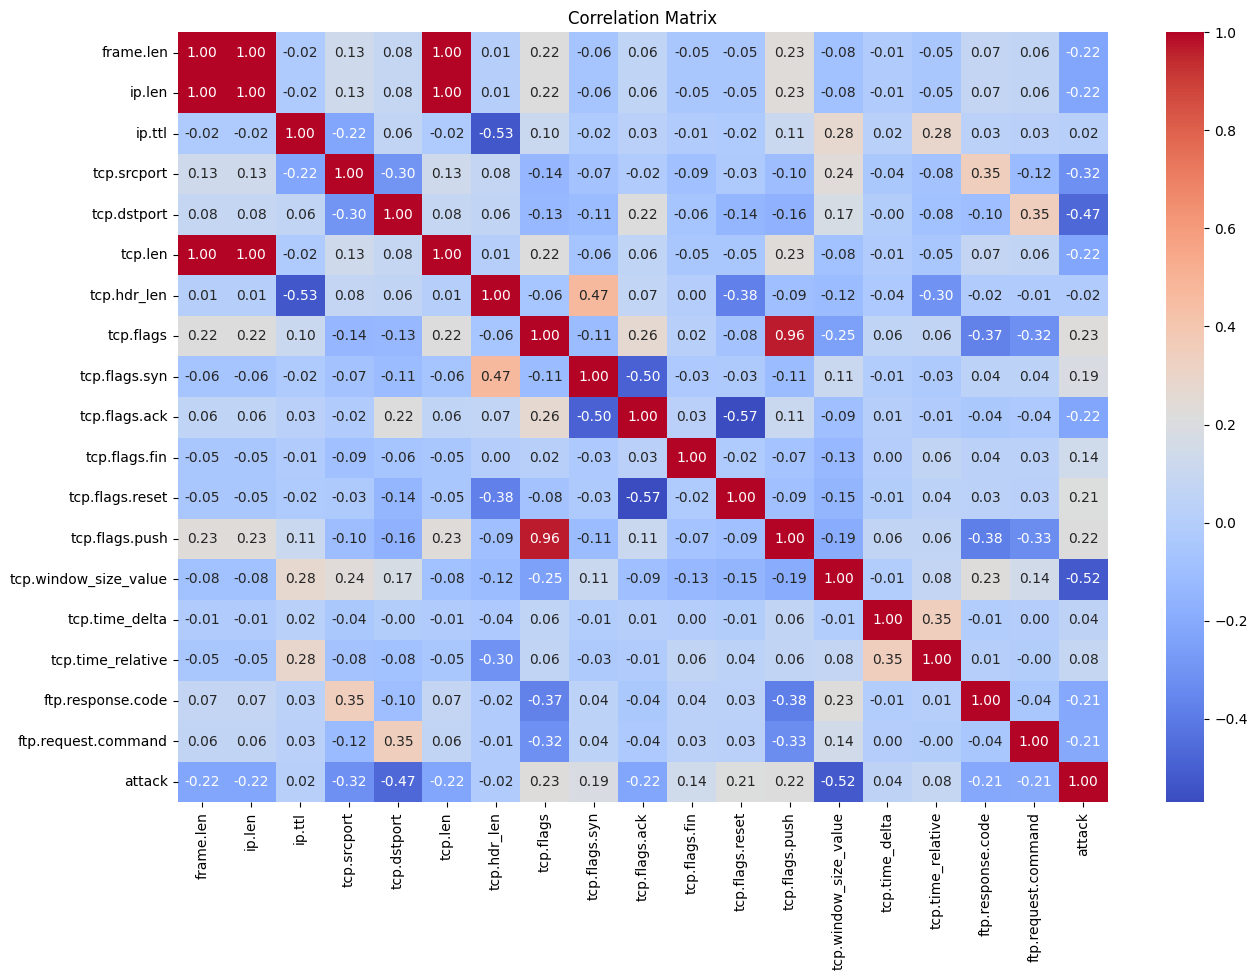

In [26]:
import seaborn as sns
corr=df_copy.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df_copy.drop('attack', axis=1)
y = df_copy['attack']

# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features (ANOVA):", list(selected_features))

Selected features (ANOVA): ['frame.len', 'ip.len', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.flags', 'tcp.flags.ack', 'tcp.flags.reset', 'tcp.flags.push', 'tcp.window_size_value']


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42, stratify=y)

## Model Building

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression()


In [56]:
model.fit(X_train, y_train)

C:\Users\Mariam\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = model.predict(X_test)

In [58]:
print('Classification Report for Logistic Regression:\n',classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     96305
           1       0.85      0.88      0.86     47102

    accuracy                           0.91    143407
   macro avg       0.89      0.90      0.90    143407
weighted avg       0.91      0.91      0.91    143407



In [59]:
from sklearn.metrics import recall_score

In [60]:
print('Logistic Regression train recall:', recall_score(y_train, model.predict(X_train)))
print('Logistic Regression test recall:', recall_score(y_test, y_pred))
print('Logistic Regression train_accuracy:', accuracy_score(y_train, model.predict(X_train)))
print('Logistic Regression test_accuracy:', accuracy_score(y_test, y_pred))

Logistic Regression train recall: 0.8753562727895164
Logistic Regression test recall: 0.8788161861492081
Logistic Regression train_accuracy: 0.9075007060349426
Logistic Regression test_accuracy: 0.909160640693969


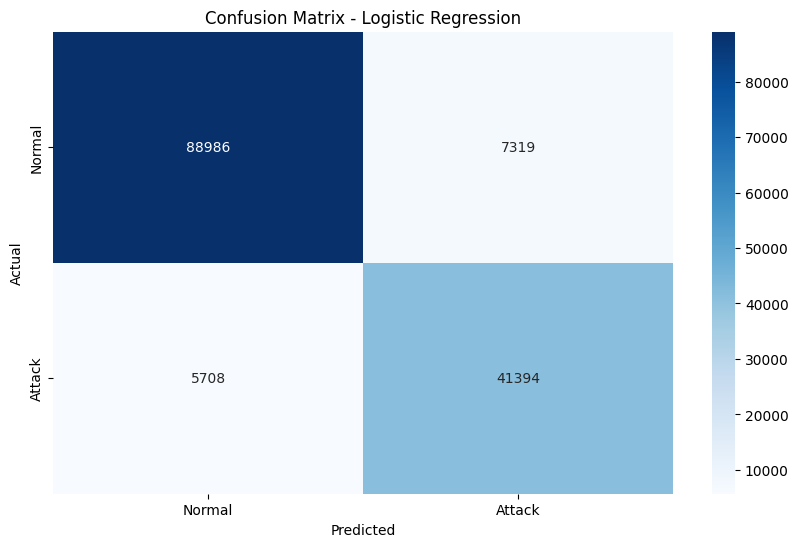

In [61]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

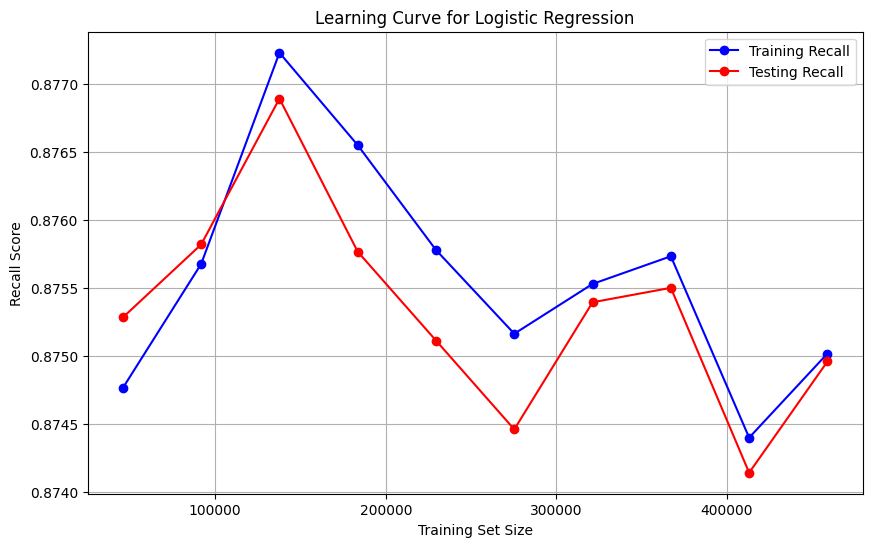

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Recall')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Testing Recall')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()

In [36]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

Logistic Regression model saved as 'logistic_regression_model.pkl'


In [62]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

LinearSVC()

In [63]:
svm_pred = model_svm.predict(X_test)

In [64]:
print('SVC train_accuracy:', accuracy_score(y_train, model_svm.predict(X_train)))
print('SVC test_accuracy:', accuracy_score(y_test, svm_pred))
print('SVC train_recall:', recall_score(y_train, model_svm.predict(X_train)))
print('SVC test_recall:', recall_score(y_test, svm_pred))

SVC train_accuracy: 0.9098314929936927
SVC test_accuracy: 0.9117267636865704
SVC train_recall: 0.8933065830188579
SVC test_recall: 0.8973928920215702


In [65]:
print('Classification Report for SVM:\n',classification_report(y_test, svm_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     96305
           1       0.84      0.90      0.87     47102

    accuracy                           0.91    143407
   macro avg       0.90      0.91      0.90    143407
weighted avg       0.91      0.91      0.91    143407



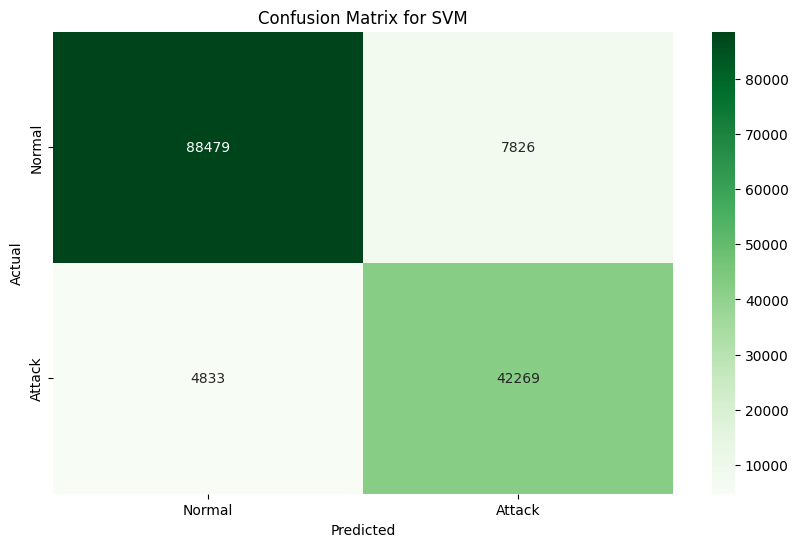

In [66]:
plt.figure(figsize=(10,6))
cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

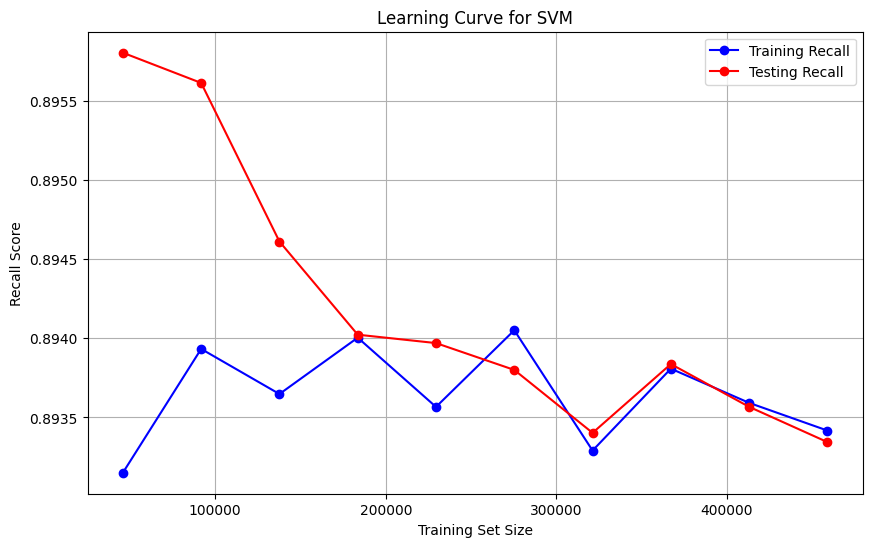

In [55]:
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    model_svm, X_train, y_train, cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_svm_mean = np.mean(train_scores_svm, axis=1)
test_scores_svm_mean = np.mean(test_scores_svm, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes_svm, train_scores_svm_mean, 'o-', color='blue', label='Training Recall')
plt.plot(train_sizes_svm, test_scores_svm_mean, 'o-', color='red', label='Testing Recall')
plt.title('Learning Curve for SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()

In [42]:
joblib.dump(model, 'SVM_model.pkl')
print("SVM model saved as 'SVM_model.pkl'")

SVM model saved as 'SVM_model.pkl'


In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_leaf=5,min_samples_split=20,n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       n_jobs=-1, random_state=42)

In [44]:
rf_pred = model_rf.predict(X_test)

In [53]:
print('Random Forest train_accuracy:', accuracy_score(y_train, model_rf.predict(X_train)))
print('Random Forest test_accuracy:', accuracy_score(y_test, rf_pred))
print('Random Forest train_recall:', recall_score(y_train, model_rf.predict(X_train)))
print('Random Forest test_recall:', recall_score(y_test, rf_pred))

Random Forest train_accuracy: 0.9889387858988261
Random Forest test_accuracy: 0.9890381919989959
Random Forest train_recall: 0.9906639279439942
Random Forest test_recall: 0.9907859538873084


In [52]:
print('classification report for Random Forest:\n', classification_report(y_test, rf_pred))

classification report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     96305
           1       0.98      0.99      0.98     47102

    accuracy                           0.99    143407
   macro avg       0.99      0.99      0.99    143407
weighted avg       0.99      0.99      0.99    143407



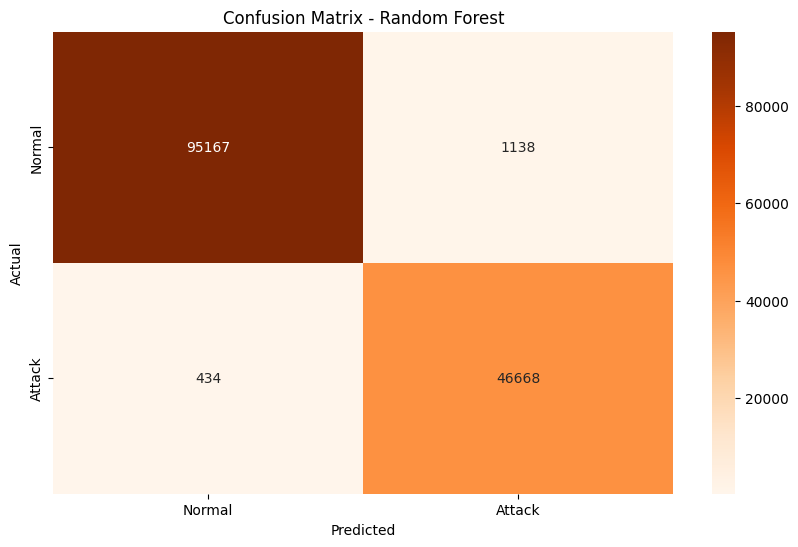

In [67]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [49]:
from sklearn.model_selection import learning_curve

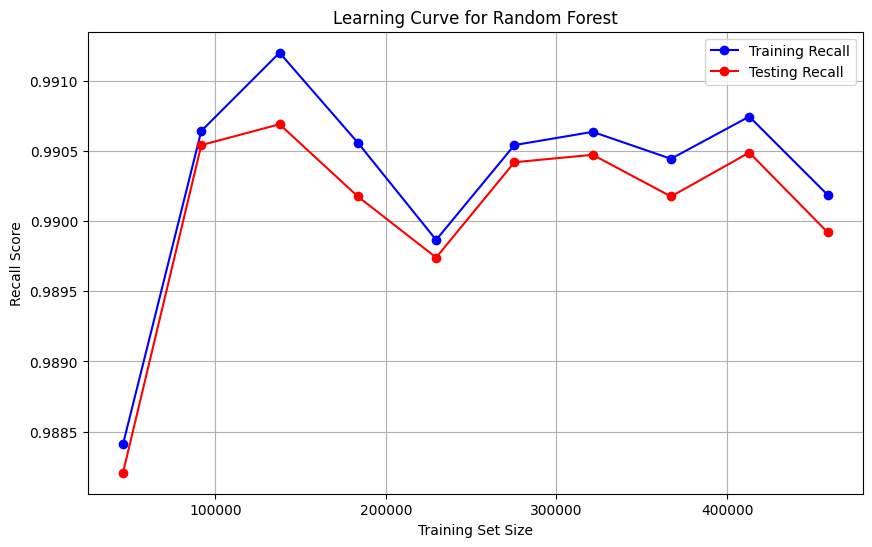

In [50]:
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    model_rf, X_train, y_train, cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_rf_mean = np.mean(train_scores_rf, axis=1)
test_scores_rf_mean = np.mean(test_scores_rf, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes_rf, train_scores_rf_mean, 'o-', color='blue', label='Training Recall')
plt.plot(train_sizes_rf, test_scores_rf_mean, 'o-', color='red', label='Testing Recall')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()

In [51]:
joblib.dump(model_rf, 'Random_Forest_model.pkl')
print("Random Forest model saved as 'Random_Forest_model.pkl'")

Random Forest model saved as 'Random_Forest_model.pkl'
